<a href="https://colab.research.google.com/github/kslote1/Data-Driven-Dynamics/blob/main/chapter_one/image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Eckhart-Young Theorem and Singular Value Decomposition (SVD)

### Singular Value Decomposition (SVD)

Singular Value Decomposition (SVD) is a fundamental matrix decomposition in linear algebra used in many fields such as signal processing, statistics, and machine learning. Given a matrix \( A \) of size \( m \times n \), SVD decomposes \( A \) into three matrices:

$$A = U \Sigma V^T$$

where:
- $U$ is an $m \times m$ orthogonal matrix,
- $\Sigma$ is an $m \times n$ diagonal matrix with non-negative real numbers on the diagonal,
- $V^T$ is the transpose of an $n \times n$ orthogonal matrix $V$.

The diagonal entries $\sigma_i$ of $\Sigma$ are known as the singular values of $A$.

### Eckhart-Young Theorem

The Eckhart-Young Theorem provides a theoretical foundation for the best low-rank approximation of a matrix using SVD. It states that the best rank-$k$ approximation $A_k$ of the matrix $A$, in terms of the Frobenius norm or the 2-norm, is obtained by keeping the first $k$ singular values of $A$ and setting the others to zero.

$$A_k = U_k \Sigma_k V_k^T$$

where:
- $U_k$ and $V_k^T$ are the first $k$ columns of $U$ and $V^T$, respectively,
- $\Sigma_k$ is the top-left $k \times k$ block of $\Sigma$ with the largest $ k$ singular values.

This approximation minimizes the error defined by $\| A - A_k \|$ for either the Frobenius norm or the 2-norm.

### Applications

- **Data Compression**: SVD can be used for data compression, reducing the size of data without losing much information.
- **Noise Reduction**: In signal processing, SVD is used to filter out noise from data.
- **Principal Component Analysis (PCA)**: PCA, a statistical procedure to convert a set of observations of possibly correlated variables into a set of linearly uncorrelated variables, is often implemented using SVD.


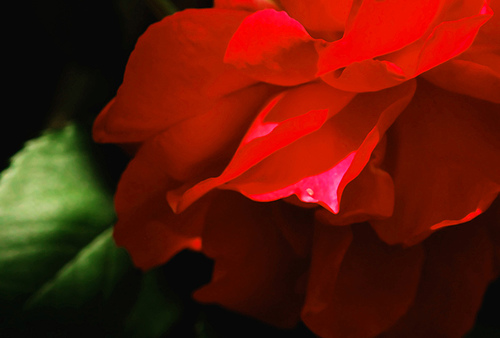

In [8]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

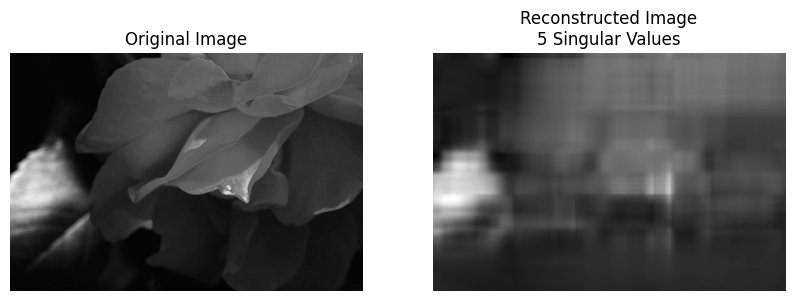

In [14]:
original_image = PIL.Image.open(str(roses[0]))

# Convert the image to grayscale
gray_image = original_image.convert('L')

# Convert grayscale image to numpy array
gray_array = np.array(gray_image)

# Singular Value Decomposition
U, S, VT = np.linalg.svd(gray_array)

# Function to reconstruct and plot image using 'r' singular values
def plot_svd_reconstructed_image(r):
    # Reconstruct image using 'r' singular values
    reconst_matrix = np.dot(U[:, :r], np.dot(np.diag(S[:r]), VT[:r, :]))

    # Plot original and reconstructed images
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(gray_array, cmap='gray')
    plt.axis('off')

    # Reconstructed image
    plt.subplot(1, 2, 2)
    plt.title(f"Reconstructed Image\n{r} Singular Values")
    plt.imshow(reconst_matrix, cmap='gray')
    plt.axis('off')

    plt.show()

# Example usage
plot_svd_reconstructed_image(5)  # You can change '30' to any value for 'r'